In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
df=pd.read_csv('D:/jupyter/german_credit_data.csv',index_col=0)
df.head(10)

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,67,male,2,own,NaN,little,1169,6,radio/TV,good
1,22,female,2,own,little,moderate,5951,48,radio/TV,bad
2,49,male,1,own,little,NaN,2096,12,education,good
3,45,male,2,free,little,little,7882,42,furniture/equipment,good
4,53,male,2,free,little,little,4870,24,car,bad
5,35,male,1,free,NaN,NaN,9055,36,education,good
6,53,male,2,own,quite rich,NaN,2835,24,furniture/equipment,good
7,35,male,3,rent,little,moderate,6948,36,car,good
8,61,male,1,own,rich,NaN,3059,12,radio/TV,good
9,28,male,3,own,little,moderate,5234,30,car,bad


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 0 to 999
Data columns (total 10 columns):
Age                 1000 non-null int64
Sex                 1000 non-null object
Job                 1000 non-null int64
Housing             1000 non-null object
Saving accounts     817 non-null object
Checking account    606 non-null object
Credit amount       1000 non-null int64
Duration            1000 non-null int64
Purpose             1000 non-null object
Risk                1000 non-null object
dtypes: int64(4), object(6)
memory usage: 85.9+ KB


In [4]:
#Changing NaN to other value for processing

df=df.fillna("nval")

In [5]:
desc=df.describe().T
desc['1%']=df.quantile(.01)
desc['5%']=df.quantile(.05)
desc['95%']=df.quantile(.95)
desc['99%']=df.quantile(.99)
desc['Q3-Q1']=desc['75%']-desc['25%']
desc['UB']=desc['75%']+(desc['Q3-Q1']*1.5)
desc['LB']=desc['25%']-(desc['Q3-Q1']*1.5)
desc=desc.loc[:,['count','mean','std','min','1%','5%','25%','50%','75%','95%','99%','max','Q3-Q1','LB','UB']]
desc

,count,mean,std,min,1%,5%,25%,50%,75%,95%,99%,max,Q3-Q1,LB,UB
Age,1000.0,35.546,11.375469,19.0,20.00,22.00,27.0,33.0,42.00,60.0,67.01,75.0,15.00,4.500,64.500
Job,1000.0,1.904,0.653614,0.0,0.00,1.00,2.0,2.0,2.00,3.0,3.00,3.0,0.00,2.000,2.000
Credit amount,1000.0,3271.258,2822.736876,250.0,425.83,708.95,1365.5,2319.5,3972.25,9162.7,14180.39,18424.0,2606.75,-2544.625,7882.375
Duration,1000.0,20.903,12.058814,4.0,6.00,6.00,12.0,18.0,24.00,48.0,60.00,72.0,12.00,-6.000,42.000


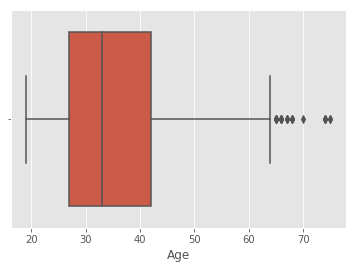

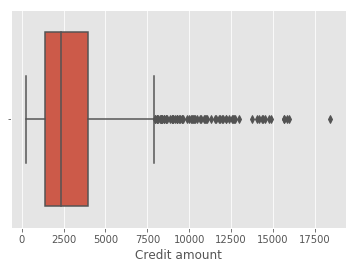

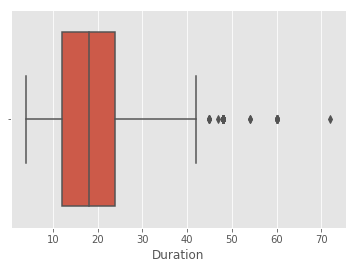

In [6]:
# Checking Outliers

plt.style.use('ggplot')
sns.boxplot(df['Age'])
plt.show()
sns.boxplot(df['Credit amount'])
plt.show()
sns.boxplot(df['Duration'])
plt.show()

In [7]:
# Preprocessing-Handling Outliers

df['Age']=df['Age'].clip_upper(desc.loc['Age','99%'])
df['Credit amount']=df['Credit amount'].clip_upper(desc.loc['Credit amount','95%'])
df['Duration']=df['Duration'].clip_upper(desc.loc['Duration','95%'])

In [8]:
#Preprocessing- Encoding variable

def ohe(i):
    global df
    col=pd.get_dummies(df[i],prefix=i)
    col=col.drop(col.columns[0],axis=1)
    df=pd.concat([df,col],axis=1)
    df=df.drop(i,axis=1)

ohe('Housing')
ohe('Saving accounts')
ohe('Checking account')
ohe('Purpose')

from sklearn.preprocessing import LabelEncoder
lc=LabelEncoder()
df['Sex']=lc.fit_transform(df['Sex'])

In [9]:
#Preprocessing-Label encoding output variable

df['Risk']=np.where(df['Risk']=='bad',0,1)

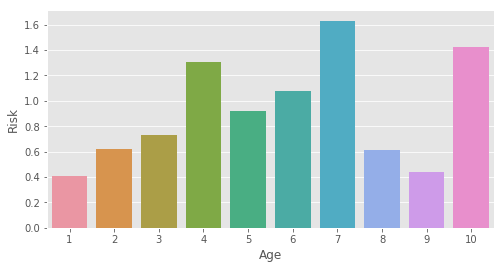

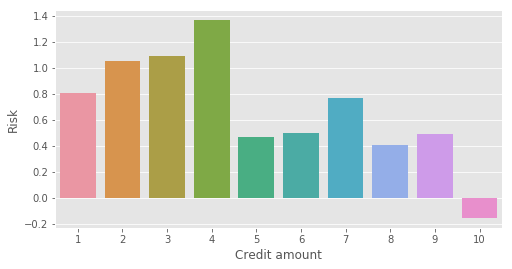

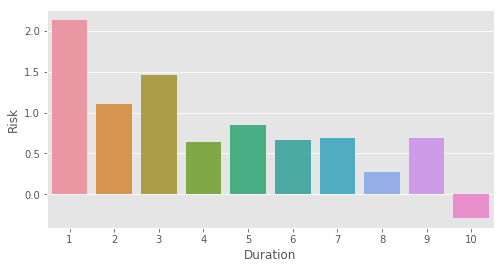

In [10]:
# Preprocessing- Checking for log

plt.style.use('ggplot')
var=['Age','Credit amount','Duration']
for num in var:
    bins = pd.cut(df[num], bins=10,labels=list(range(1,11)))
    logod = df.groupby(bins)['Risk'].sum() / (df.groupby(bins)['Risk'].count()-df.groupby(bins)['Risk'].sum())
    logod = np.log(logod)
    plt.subplots(figsize=(8,4))
    sns.barplot(x=logod.index,y=logod)

In [11]:
# Preprocessing-Categorising numerical variables

df['binss']=pd.cut(df['Age'],bins=10,labels=list(range(1,11)))
df['Age']=np.where((df['binss']==1)|(df['binss']==9),1,
                   np.where((df['binss']==2)|(df['binss']==3)|(df['binss']==8),2,
                            np.where((df['binss']==5)|(df['binss']==6),3,
                                     np.where((df['binss']==4)|(df['binss']==10),4,5))))

df['binss']=pd.cut(df['Credit amount'],bins=10,labels=list(range(1,11)))
df['Credit amount']=np.where((df['binss']==5)|(df['binss']==6)|(df['binss']==8)|(df['binss']==9),1,
                             np.where((df['binss']==2)|(df['binss']==3),2,
                                      np.where((df['binss']==1)|(df['binss']==7),3,
                                               np.where((df['binss']==4),4,5))))

df['binss']=pd.cut(df['Duration'],bins=10,labels=list(range(1,11)))
df['Duration']=np.where((df['binss']==4)|(df['binss']==5)|(df['binss']==6)|(df['binss']==7)|(df['binss']==9),1,
                        np.where((df['binss']==2)|(df['binss']==3),2,
                                 np.where((df['binss']==1),3,
                                          np.where((df['binss']==8),4,5))))

df=df.drop('binss',axis=1)

In [12]:
# Removing Variable with Low correlations

var=df.columns.difference(['Risk'])
for num in var:
    cor=np.corrcoef(df['Risk'],df[num])[0][1]
    if((cor<0.03) and (cor>-0.03)):
        df=df.drop(num,axis=1)    

In [13]:
df.head()

,Age,Sex,Job,Duration,Risk,Housing_own,Housing_rent,Saving accounts_nval,Saving accounts_quite rich,Saving accounts_rich,Checking account_moderate,Checking account_nval,Checking account_rich,Purpose_education,Purpose_radio/TV
0,4,1,2,3,1,1,0,1,0,0,0,0,0,0,1
1,1,0,2,5,0,1,0,0,0,0,1,0,0,0,1
2,5,1,1,2,1,1,0,0,0,0,0,1,0,1,0
3,3,1,2,1,1,0,0,0,0,0,0,0,0,0,0
4,2,1,2,1,0,0,0,0,0,0,0,0,0,0,0


In [14]:
#Seperating Output variable 

y=df['Risk']
df=df.drop(['Risk'],axis=1)

In [15]:
#Over-Sampling Minority Group

from imblearn.over_sampling import SMOTE

sm=SMOTE(random_state=0,k_neighbors=5,ratio='minority')
df,y=sm.fit_sample(df,y)

In [16]:
#Spliting Data into Test and Train

from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test=train_test_split(df,y,test_size=0.2,random_state=0)

__Model 1: Random Forest__

In [17]:
#Random Forest Classification

from sklearn.ensemble import RandomForestClassifier

model=RandomForestClassifier(random_state=0,max_depth=10, min_samples_split=12, n_estimators=30, n_jobs=-1)
model.fit(x_train,y_train)
y_pred=model.predict(x_test)

In [18]:
#Testing accuracy

from sklearn.metrics import accuracy_score,confusion_matrix,f1_score,roc_auc_score
from sklearn.model_selection import cross_val_score

cv_acc=cross_val_score(estimator=model,X=x_train,y=y_train,cv=10)
cm=confusion_matrix(y_test,y_pred)
cv_acc=cv_acc.mean()
acc=accuracy_score(y_test,y_pred)
f1=f1_score(y_test,y_pred,average='binary')
auc=roc_auc_score(y_test,y_pred)
sen=cm[0][0]/(cm[0][0]+cm[1][0])
spec=cm[1][1]/(cm[1][1]+cm[0][1])

# Printing Output

print('\nTraining Accuracy:',cv_acc)
print('\nTesting Accuracy:',acc)
print('\nSensitivity',sen)
print('\nSpecificity',spec)
print('\nF1 Score:',f1)
print('\nAUC Score:',auc)
print('\nConfusion Matrix:\n',cm)


Training Accuracy: 0.7776988587829295

Testing Accuracy: 0.7821428571428571

Sensitivity 0.76

Specificity 0.8076923076923077

F1 Score: 0.7749077490774908

AUC Score: 0.7824123679779581

Confusion Matrix:
 [[114  25]
 [ 36 105]]


__Model 2: SVC__

In [19]:
from sklearn.svm import SVC

model2=SVC(kernel='rbf', random_state=0, C=40, gamma='auto')
model2.fit(x_train,y_train)
y_pred=model2.predict(x_test)

In [20]:
#Testing accuracy

from sklearn.metrics import accuracy_score,confusion_matrix,f1_score,roc_auc_score
from sklearn.model_selection import cross_val_score

cv_acc=cross_val_score(estimator=model2,X=x_train,y=y_train,cv=10)
cm=confusion_matrix(y_test,y_pred)
cv_acc=cv_acc.mean()
acc=accuracy_score(y_test,y_pred)
f1=f1_score(y_test,y_pred,average='binary')
auc=roc_auc_score(y_test,y_pred)
sen=cm[0][0]/(cm[0][0]+cm[1][0])
spec=cm[1][1]/(cm[1][1]+cm[0][1])

# Printing Output

print('\nTraining Accuracy:',cv_acc)
print('\nTesting Accuracy:',acc)
print('\nSensitivity',sen)
print('\nSpecificity',spec)
print('\nF1 Score:',f1)
print('\nAUC Score:',auc)
print('\nConfusion Matrix:\n',cm)


Training Accuracy: 0.7696232104417946

Testing Accuracy: 0.8071428571428572

Sensitivity 0.7972027972027972

Specificity 0.8175182481751825

F1 Score: 0.8057553956834532

AUC Score: 0.8072350630134191

Confusion Matrix:
 [[114  25]
 [ 29 112]]


__Model 3: GradientBoosting__

In [21]:
# GradientBoosting Classification

from sklearn.ensemble import GradientBoostingClassifier

model3=GradientBoostingClassifier(random_state=0,max_depth=12, min_samples_split=13, n_estimators=80)
model3.fit(x_train,y_train)
y_pred=model3.predict(x_test)

In [22]:
#Testing accuracy

from sklearn.metrics import accuracy_score,confusion_matrix,f1_score,roc_auc_score
from sklearn.model_selection import cross_val_score

cv_acc=cross_val_score(estimator=model3,X=x_train,y=y_train,cv=10)
cm=confusion_matrix(y_test,y_pred)
cv_acc=cv_acc.mean()
acc=accuracy_score(y_test,y_pred)
f1=f1_score(y_test,y_pred,average='binary')
auc=roc_auc_score(y_test,y_pred)
sen=cm[0][0]/(cm[0][0]+cm[1][0])
spec=cm[1][1]/(cm[1][1]+cm[0][1])

# Printing Output

print('\nTraining Accuracy:',cv_acc)
print('\nTesting Accuracy:',acc)
print('\nSensitivity',sen)
print('\nSpecificity',spec)
print('\nF1 Score:',f1)
print('\nAUC Score:',auc)
print('\nConfusion Matrix:\n',cm)


Training Accuracy: 0.7687142657828498

Testing Accuracy: 0.7714285714285715

Sensitivity 0.7659574468085106

Specificity 0.7769784172661871

F1 Score: 0.7714285714285715

AUC Score: 0.7714679320373489

Confusion Matrix:
 [[108  31]
 [ 33 108]]


__The Support Vector Classifier gave the best result of the three model.__